In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
obs_A = pd.read_parquet("../../preprocessing/data/obs_A.parquet")
est_A = pd.read_parquet("../../preprocessing/data/est_A.parquet")
test_A = pd.read_parquet("../../preprocessing/data/test_A.parquet")

obs_B = pd.read_parquet("../../preprocessing/data/obs_B.parquet")
est_B = pd.read_parquet("../../preprocessing/data/est_B.parquet")
test_B = pd.read_parquet("../../preprocessing/data/test_B.parquet")

obs_C = pd.read_parquet("../../preprocessing/data/obs_C.parquet")
est_C = pd.read_parquet("../../preprocessing/data/est_C.parquet")
test_C = pd.read_parquet("../../preprocessing/data/test_C.parquet")

In [3]:
# Concatenate data
A = pd.concat([obs_A, est_A, test_A], axis=0).dropna(subset=['pv_measurement'])
B = pd.concat([obs_B, est_B, test_B], axis=0).dropna(subset=['pv_measurement'])
C = pd.concat([obs_C, est_C, test_C], axis=0).dropna(subset=['pv_measurement'])

master_df = pd.concat([A, B, C], axis=0)

# Remove duplicate columns (keeping the first occurrence)
master_df = master_df.loc[:, ~master_df.columns.duplicated()]



In [4]:
# All columns
columns = [
    'pv_measurement', 'date_forecast', 'snow_accumulation',
    'total_radiation', 'sfc_pressure:hPa', 'month', 'year',
    'date_forecast_fft_amplitude', 'date_forecast_fft_phase',
    'sun_elevation:d_fft_amplitude', 'sun_elevation:d_fft_phase',
    'clear_sky_rad:W_rate_of_change', 'direct_rad:W_rate_of_change',
    'diffuse_rad:W_rate_of_change', 'total_radiation_rate_of_change',
    'effective_cloud_cover:p_rate_of_change', 'dew_or_rime:idx'
    'total_cloud_cover:p_rate_of_change', 'observed', 'sun_azimuth:d_lag_7',
    'sfc_pressure:hPa_lag_8', 't_1000hPa:K_lag_4', 'dew_or_rime:idx_lag_11',
    'relative_humidity_1000hPa:p_lag_-3', 'temp_dewpoint_diff_lag_-4',
    'dew_point_2m:K_lag_19', 'visibility:m_lag_-2', 'absolute_humidity_2m:gm3'
    't_1000hPa:K_rolling_avg_24', 'msl_pressure:hPa_rolling_avg_24',
    'msl_pressure:hPa', 'absolute_humidity_2m:gm3_rolling_avg_24',
    'total_cloud_cover:p_rolling_avg_6', 'total_radiation_rolling_avg_3',
    'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
    'clear_sky_rad:W', 'sun_elevation:d', 't_1000hPa:K',
    'dew_point_2m:K', 'effective_cloud_cover:p', 'clear_sky_energy_1h:J',
    'sun_elevation_direct_rad_interaction', 'humidity_temp_interaction',
    'temp_rad_interaction', 'air_density_2m:kgm3', 'msl_pressure:hPa_lag_3',
    'total_cloud_cover:p', 't_1000hPa:K_rate_of_change', 'wind_vector_magnitude',
    'average_wind_speed', 'visibility:m', 'pressure_gradient',
    'temp_dewpoint_diff', 'sun_elevation:d_rolling_avg_6',
    'super_cooled_liquid_water:kgm2', 'relative_humidity_1000hPa:p',
    'is_day:idx', 'is_in_shadow:idx', 'pressure_50m:hPa', 'sun_azimuth:d',
    'snow_water:kgm2', 'precip_5min:mm', 'precip_type_5min:idx',
    'pressure_100m:hPa', 'rain_water:kgm2', 'snow_depth:cm',
    'snow_melt_10min:mm', 'prob_rime:p', 'wind_speed_w_1000hPa:ms',
    'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_10m:ms',
    'fresh_snow_24h:cm', 'fresh_snow_12h:cm', 'fresh_snow_6h:cm',
    'fresh_snow_3h:cm', 'fresh_snow_1h:cm', 'elevation:m',
    'ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3',
    'snow_drift:idx'
]

# Variables related to the photovoltaic (PV) measurements and forecasts
pv_columns = [
    'pv_measurement', 'date_forecast', 'total_radiation',
    'date_forecast_fft_amplitude', 'date_forecast_fft_phase',
    'total_radiation_rate_of_change', 'total_radiation_rolling_avg_3'
]

# Variables related to snow measurements
snow_columns = [
    'pv_measurement', 'snow_accumulation', 'snow_water:kgm2', 'fresh_snow_24h:cm',
    'fresh_snow_12h:cm', 'fresh_snow_6h:cm', 'fresh_snow_3h:cm',
    'fresh_snow_1h:cm', 'snow_depth:cm', 'snow_melt_10min:mm',
    'snow_density:kgm3'
]

# Variables related to atmospheric pressure
pressure_columns = [
    'pv_measurement', 'sfc_pressure:hPa', 'msl_pressure:hPa', 'msl_pressure:hPa_lag_3',
    'pressure_gradient', 'pressure_50m:hPa', 'pressure_100m:hPa'
]

# Variables related to cloud cover and related phenomena
cloud_columns = [
    'pv_measurement', 'effective_cloud_cover:p', 'total_cloud_cover:p',
    'effective_cloud_cover:p_rate_of_change',
    'total_cloud_cover:p_rate_of_change', 'total_cloud_cover:p_rolling_avg_6',
    'ceiling_height_agl:m', 'cloud_base_agl:m', 'prob_rime:p',
    'super_cooled_liquid_water:kgm2'
]

# Variables related to temperature
temperature_columns = [
    'pv_measurement', 't_1000hPa:K', 'dew_point_2m:K', 'temp_dewpoint_diff',
    't_1000hPa:K_lag_4', 'temp_dewpoint_diff_lag_-4',
    't_1000hPa:K_rolling_avg_24', 't_1000hPa:K_rate_of_change'
]

# Variables related to humidity
humidity_columns = [
    'pv_measurement', 'dew_or_rime:idx', 'relative_humidity_1000hPa:p', 'humidity_temp_interaction',
    'absolute_humidity_2m:gm3', 'absolute_humidity_2m:gm3_rolling_avg_24'
]

# Variables related to wind
wind_columns = [
    'pv_measurement', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms',
    'wind_speed_w_1000hPa:ms', 'wind_vector_magnitude', 'average_wind_speed'
]

# Variables related to solar radiation
solar_columns = [
    'pv_measurement', 'sun_elevation:d', 'sun_azimuth:d', 'sun_elevation:d_fft_amplitude',
    'sun_elevation:d_fft_phase', 'sun_elevation:d_rolling_avg_6',
    'sun_elevation_direct_rad_interaction', 'clear_sky_rad:W',
    'clear_sky_rad:W_rate_of_change', 'clear_sky_energy_1h:J',
    'direct_rad:W', 'direct_rad:W_rate_of_change', 'direct_rad_1h:J',
    'diffuse_rad:W', 'diffuse_rad:W_rate_of_change', 'diffuse_rad_1h:J'
]

# Variables related to visibility and atmospheric phenomena
visibility_columns = [
    'pv_measurement', 'visibility:m', 'visibility:m_lag_-2', 'is_day:idx', 'is_in_shadow:idx',
    'ceiling_height_agl:m', 'cloud_base_agl:m'
]

# Variables related to precipitation
precipitation_columns = [
    'pv_measurement', 'precip_5min:mm', 'precip_type_5min:idx', 'rain_water:kgm2',
    'snow_melt_10min:mm'
]

# Miscellaneous time-related or lagged variables
time_lagged_columns = [
    'pv_measurement', 'sun_azimuth:d_lag_7', 'sfc_pressure:hPa_lag_8', 'dew_or_rime:idx_lag_11',
    'relative_humidity_1000hPa:p_lag_-3', 'msl_pressure:hPa_lag_3'
]

# Add any additional or missing columns as needed
miscellaneous_columns = [
    'pv_measurement', 'month', 'year', 'elevation:m', 'snow_drift:idx', 'observed'
]


In [5]:
best_columns = [
    'pv_measurement'
]

/Users/mathiasotnes/anaconda3/envs/TDT4173-MPC/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


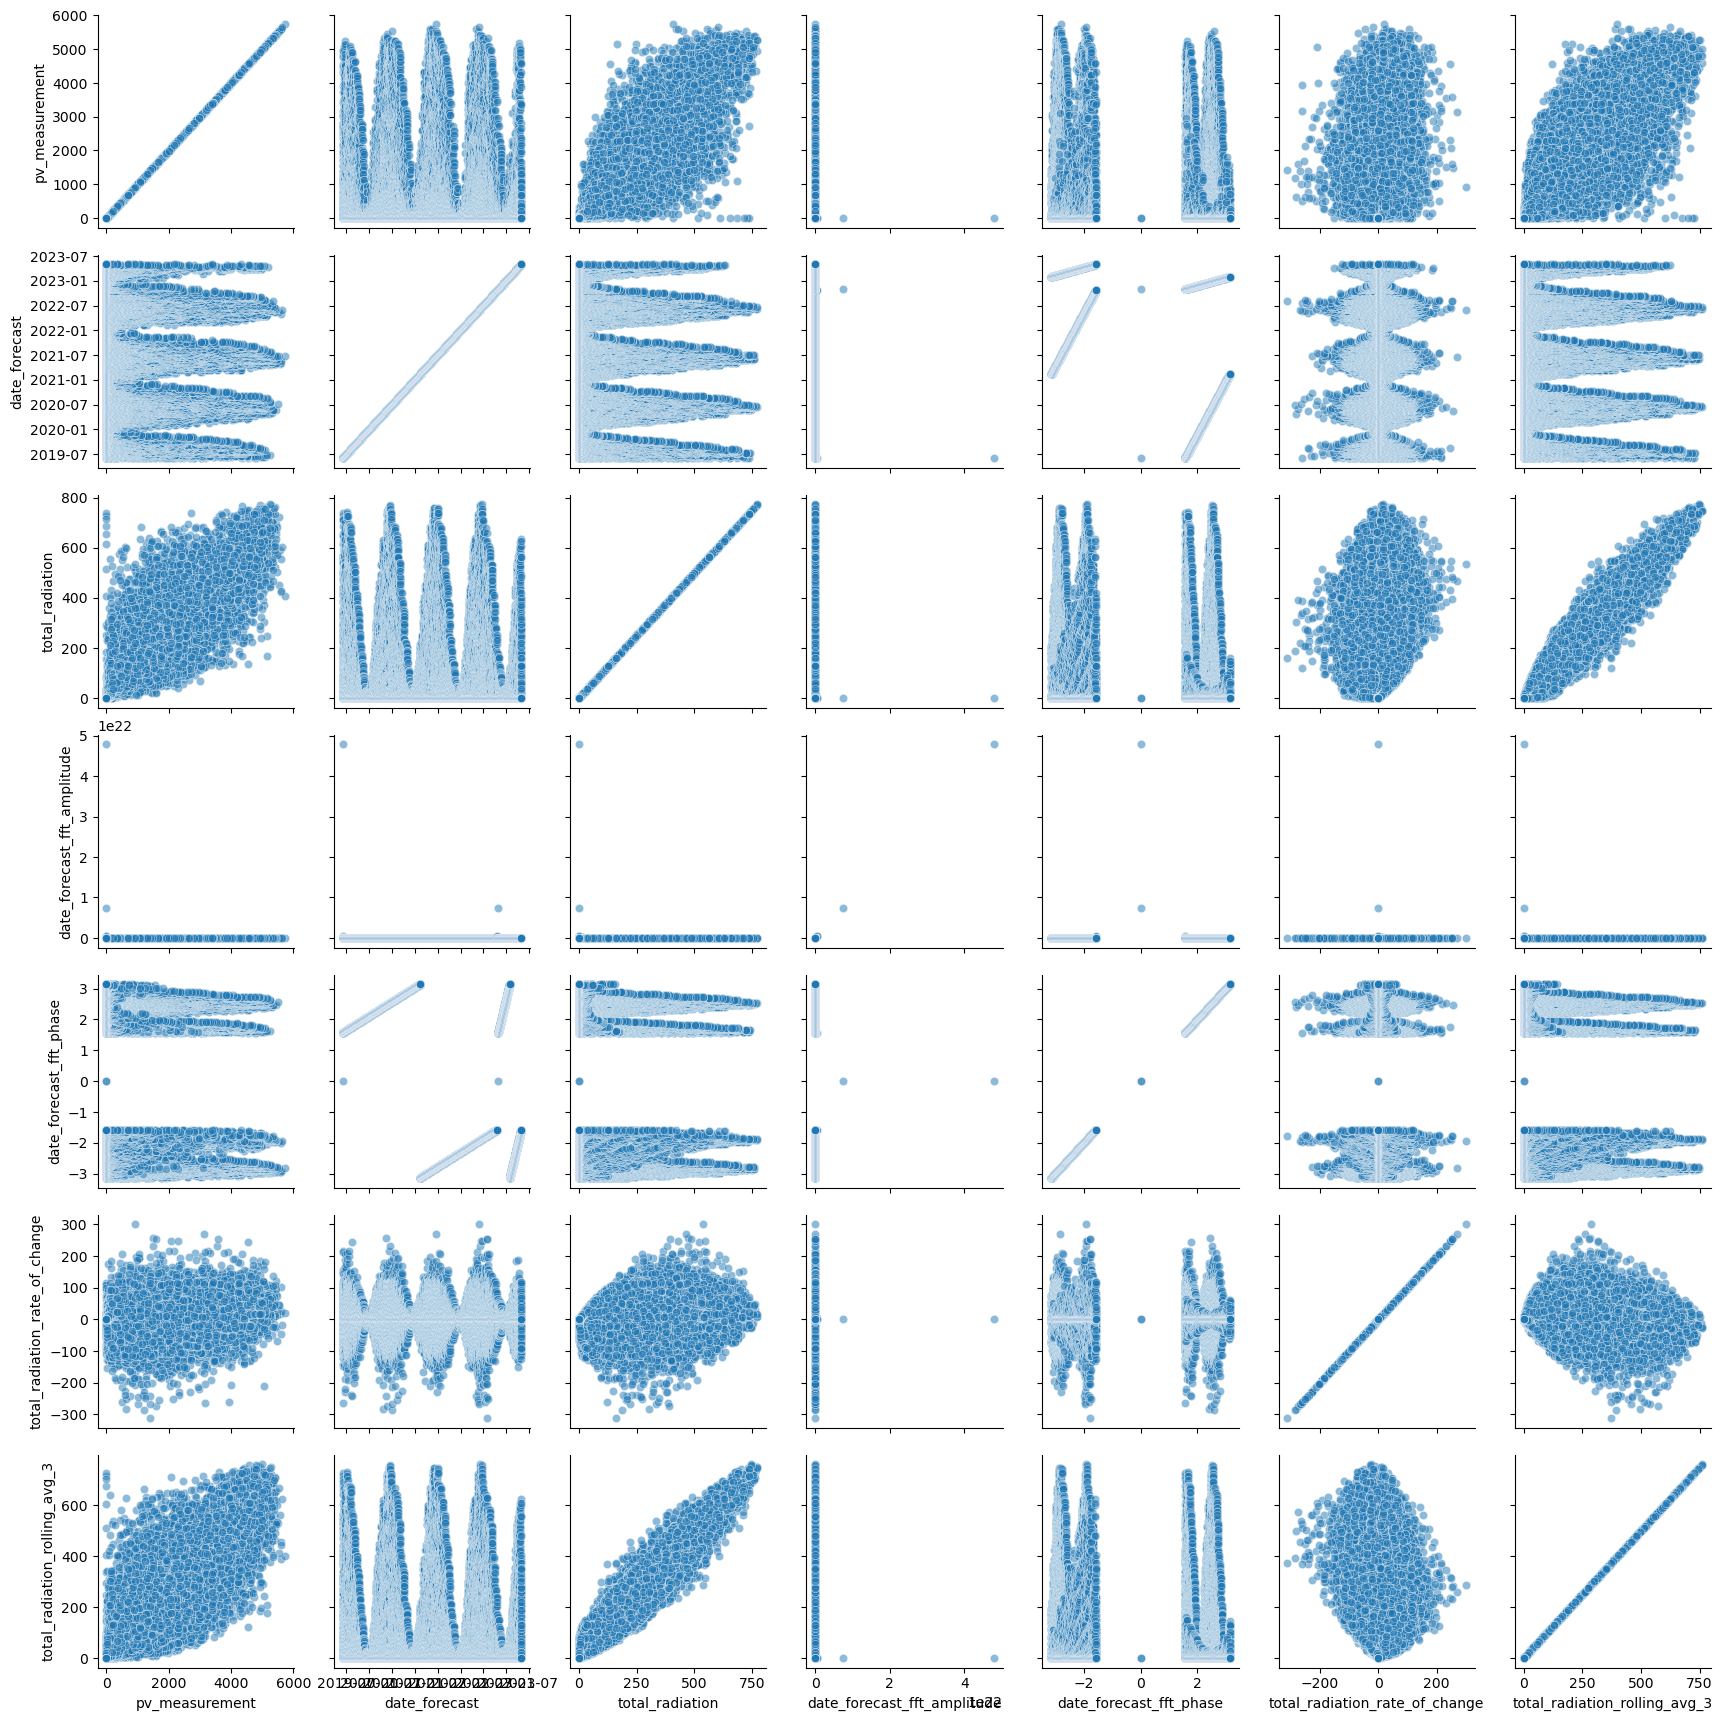

In [6]:
# Possible column groups are
#   - pv_columns
#   - snow_columns
#   - pressure_columns
#   - cloud_columns
#   - temperature_columns
#   - humidity_columns
#   - wind_columns
#   - solar_columns
#   - visibility_columns
#   - precipitation_columns
#   - time_lagged_columns
#   - miscellaneous_columns

# Select dataset and columns to plot
df = A
columns_to_plot = pv_columns

# Plot
sns.pairplot(df, vars=columns_to_plot, diag_kind=None, plot_kws={"alpha": 0.5})
plt.savefig("pairplots/pv_columns.png")
plt.show()

# **Observations**

## pv_columns

- `total_radiation` has a linear relationship with `pv_measurement`.
- `date_forecast_fft_amplitude` and `date_forecast_fft_phase` look pretty useless. 
- `total_radiation_rate_of_change` seems to not tell anything about `pv_measurement`.
- `total_radiation_rollinig_avg_3` is very similar to `total_radiation`, and keeping both would likelly lead to multicollinearity.

<strong>`total_radiation` is the only feature that should be kept, and further feature engineering is probaly not necessary</strong>

## snow_columns

- All the snow features have some negative correlation between with the `pv_measurement`. Most of them have mostly zeroes.
- `snow_accumulation` has good correlation with all snow features, and is a good representative to them all.

<strong>Use `snow_accumulation` as the only snow feature</strong>

## pressure_columns

- The values are very big, and looks like they're all constant for the different `pv_measurement` values, but normalizing these can propably lead so show some relation.

<strong>These features need some scaling</strong>

## cloud_columns

- `effective_cloud_cover:p` and `total_cloud_cover:p` has a very high correlation with eachother, but they seem random in relation to `pv_measurement`. These should be investigated to see if they can show a non-random pattern when combined with other features. 
- `cloud_base_agl:m` has a slightly negative correlation with `pv_measurement`, and not many relationships to other features. This should be investigated.
- `super_cooled_liquid_water:kgm2` has a negative correlation with `pv_measurement`, and slight positive correlation with `effective_cloud_cover:p` and `total_cloud_cover:p` which can hint of a relationship between cloud cover and when the liquid is used. Maybe this can be used to find a relationship between the seemingly random cloud covers and `pv_measurement`

<strong>Only one of `effective_cloud_cover:p` and `total_cloud_cover:p` should be used, but should be combined with other features to reveal a relationship. `cloud_base_agl:m` can maybe get used, but propably not the best feature without engineering. `super_cooled_liquid_water:kgm2` is a good feature. </strong>

## temperature_columns

- `t_1000hPa:K` and `dew_point_2m:K` may have a correlation with `pv_measurement`, but they need scaling in order to reveal this.
- `temp_dewpoint_diff` seems to have correlation with `pv_measurement`, but this can be just because the temperatures has been scaled because `t_1000hPa:K` and `dew_point_2m:K` have similar scales which leads their difference to be pretty standardized. The lagged feature `temp_dewpoint_diff_lag_-4` has high correlation with `temp_dewpoint_diff`, and only one should be kept. It's likelly that the lagged feature is artificially more correlated to `pv_measurement`, and should be removed. 
- `t_1000hPa:K_rate_of_change` seems to have a slight positive correlation to `pv_measurement`, and no correlation with other features, and should be kept, but some engineering for scaling is maybe necessary.
- `t_1000hPa:K` and `dew_point_2m:K` have some datapoints in 0 kelvin, which should be removed.

<strong>Scale the features `t_1000hPa:K_rate_of_change`, `t_1000hPa:K` and `dew_point_2m:K`. Remove 0 kelvin datapoints, and figure out if we need both `t_1000hPa:K` and `dew_point_2m:K` or if we should only choose one.</strong>

## humidity_columns

- Roughly all high values of `pv_measurment` is when `dew_or_rime:idx` is 0, and this can maybe be engineered a bit, it can maybe be used as a "filter" for high measurements. 
- `relative_humidity_1000hPa:p` and `absolute_humidity_1000hPa:p` doesn't have too much correlation, both can be kept, but `relative_humidity_1000hPa:p` may encode the temperature dependency, which can be more beneficial. The both seem to be uncorrelated to `pv_measurement`, but an implicit correlation should be searched for. 
- All features mulitplied with temperature is almost perfectly correlated with the original feature, be aware of this. Scale the temperature before making the interaction feature, or don't include the interaction features. 
- Rolling averages don't seem to have much effect.

<strong>Search for a combined feature including `relative_humidity_1000hPa:p` and/or `absolute_humidity_1000hPa:p` for revealing a implicit correlation.</strong>

## wind_columns

- All wind speed columns seems very correlated to `average_wind_speed`, which has the best correlation with `pv_measurement`.
- `wind_speed_w_1000hPa:ms` seems useless.
- `wind_vector_magnitude` is similar to `average_wind_speed` and correlated, but slightly less correlated to `pv_measurement`.

<strong>Only keep `average_wind_speed`.</strong>

## solar_columns

- `sun_elevation:d` has a high correlation with `pv_measurement`. All the measurements are 0 when `sun_elevation:d` are 0 and less. Some engineering may be necessary, it whould have a lot of weight when the elevation is 0 or less, because it shouldn't be possible with positive `pv_measurments` without sun.
- `sun_azimuth:d` has a bell curve correlation with `pv_measurement`, and could maybe benefit from some engineering. It's a very clear pattern. It has similar correlation to a lot of the other radiation features.
- `sun_elevation:dfft_amplitude` seems bad, and has values close to infinity. 
- `sun_elevation:dfft_phase` has some strange patterns, but is seemingly random regarding `pv_measurement`, and should be dropped.
- `sun_elevation_rolling_avg_6` looses information about the measurement being 0 when there is no sun. It's very correlated with `sun_elevation:d`, and it should be removed. 
- `sun_elevation_direct_rad_interaction` seems very nicely correlated with `pv_measurement`. I would like to see what happens if `sun_elevation:d` is strictly positive before combining. This interaction feature should also be scaled down a bit, and it could possibly use `total_radiation` instead of `direct_rad:W`.
- `clear_sky_rad:W` is very correlated with `pv_measurement`, but also to `clear_sky_energy_1h:J`, and only one of them should be kept. It seems like it can't be larger than `direct_rad:W`, so maybe an interaction feature here could be interesting. 
- `direct_rad:W` and `direct_rad_1h:J` is very correlated, only one should be kept, but they have good correlation with `pv_measurement`.
- `direct_rad:W_rate_of_change` seems uncorrelated to `pv_measurement`.
- `diffuse_rad:W` seems somewhat uncorrelated to `direct_rad:W`, but very correlated to `pv_measurement`. It's very correlated to `diffuse_rad_1h:J`, and only one of them should be kept. 
- `diffuse_rad:W_rate_of_change` seems uncorrelated to `pv_measurement`.

<strong>Experimant with `sun_elevation:d` and `sun_azimuth`. Remove fft features and rolling averages. Experiment with interaction features with `sun_elevation:d`. Experiment with interaction between `clear_sky_energy_1h:J`, `clear_sky_rad:W` and other radiation features. Remove all rate of change features. Test what is best between `total_radiation` and having both `diffuse_rad:W` and `direct_rad:W`</strong>

## visibility_columns

- `visibility:m` seems uncorrelated to `pv_measurement`, but maybe it can be used as an interaction features.
- `ceiling_height_agl:m` seems to always be larger than `cloud_base_agl:m`, but both of them seem uncorrelated to pv_measurement. Maybe a boolean value can be extracted from these to indicate whether or not there is clouds.
- `is_day:idx` and `is_in_shadow:idx` has all the high `pv_measurement` values where you expect them, but it doesn't seem to provide a lot of info. Maybe it can be used in another feature.

<strong>Experiment with `visibility:m`, `ceiling_height_agl:m`, `cloud_base_agl:m`, `is_day:idx` and `is_in_shadow:idx`. They all seem useless on their own.</strong>

## precipitation_columns

- `rain_water:kgm2` seems correlated to `pv_measurement`, and should be explored. 
- `precip_5min:mm` seems similar to `rain_water:kgm2`, but with less information. It can maybe be combined with `precip_type_5min:idx` to reveal a correlation.
- The rest of the features doesn't seem to provide much info.

<strong>Explore the combination of `precip_5min:mm` and `precip_type_5min:idx`. Maybe try to include `rain_water:kgm2`.</strong>

## time_lagged_columns

<strong>These all seem to include artificial correlations, and should likelly not be included.</strong>

## miscellaneous_columns

- `elevation:m` has some measurements that deviates. What's the deal with that?
- `month` seems to show a clear trend, maybe some engineering to get the relationship to get caught by the model.
- `observed` is uncorrelated, but maybe it can be combined with another feature.

<strong>Investigate ways to empasize the relationship between `month` and `pv_measurement`. Maybe explore combinatied features with `observed`.</strong>